In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

In [3]:
train_files_healthy = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Train/Train/Healthy"
train_files_powdery = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Train/Train/Powdery"
train_files_rust = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Train/Train/Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434


In [4]:
test_files_healthy = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Test/Test/Healthy"
test_files_powdery = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Test/Test/Powdery"
test_files_rust =    "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Test/Test/Rust"

print("Number of healthy leaf images in training set", total_files(test_files_healthy ))
print("Number of powder leaf images in training set", total_files(test_files_powdery))
print("Number of rusty leaf images in training set", total_files(test_files_rust))

Number of healthy leaf images in training set 50
Number of powder leaf images in training set 50
Number of rusty leaf images in training set 50


In [5]:
valid_files_healthy = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Validation/Validation/Healthy"
valid_files_powdery = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Validation/Validation/Powdery"
valid_files_rust = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Validation/Validation/Rust"

print("Number of healthy leaf images in training set", total_files(valid_files_healthy ))
print("Number of powder leaf images in training set", total_files(valid_files_powdery))
print("Number of rusty leaf images in training set", total_files(valid_files_rust))

Number of healthy leaf images in training set 20
Number of powder leaf images in training set 20
Number of rusty leaf images in training set 20


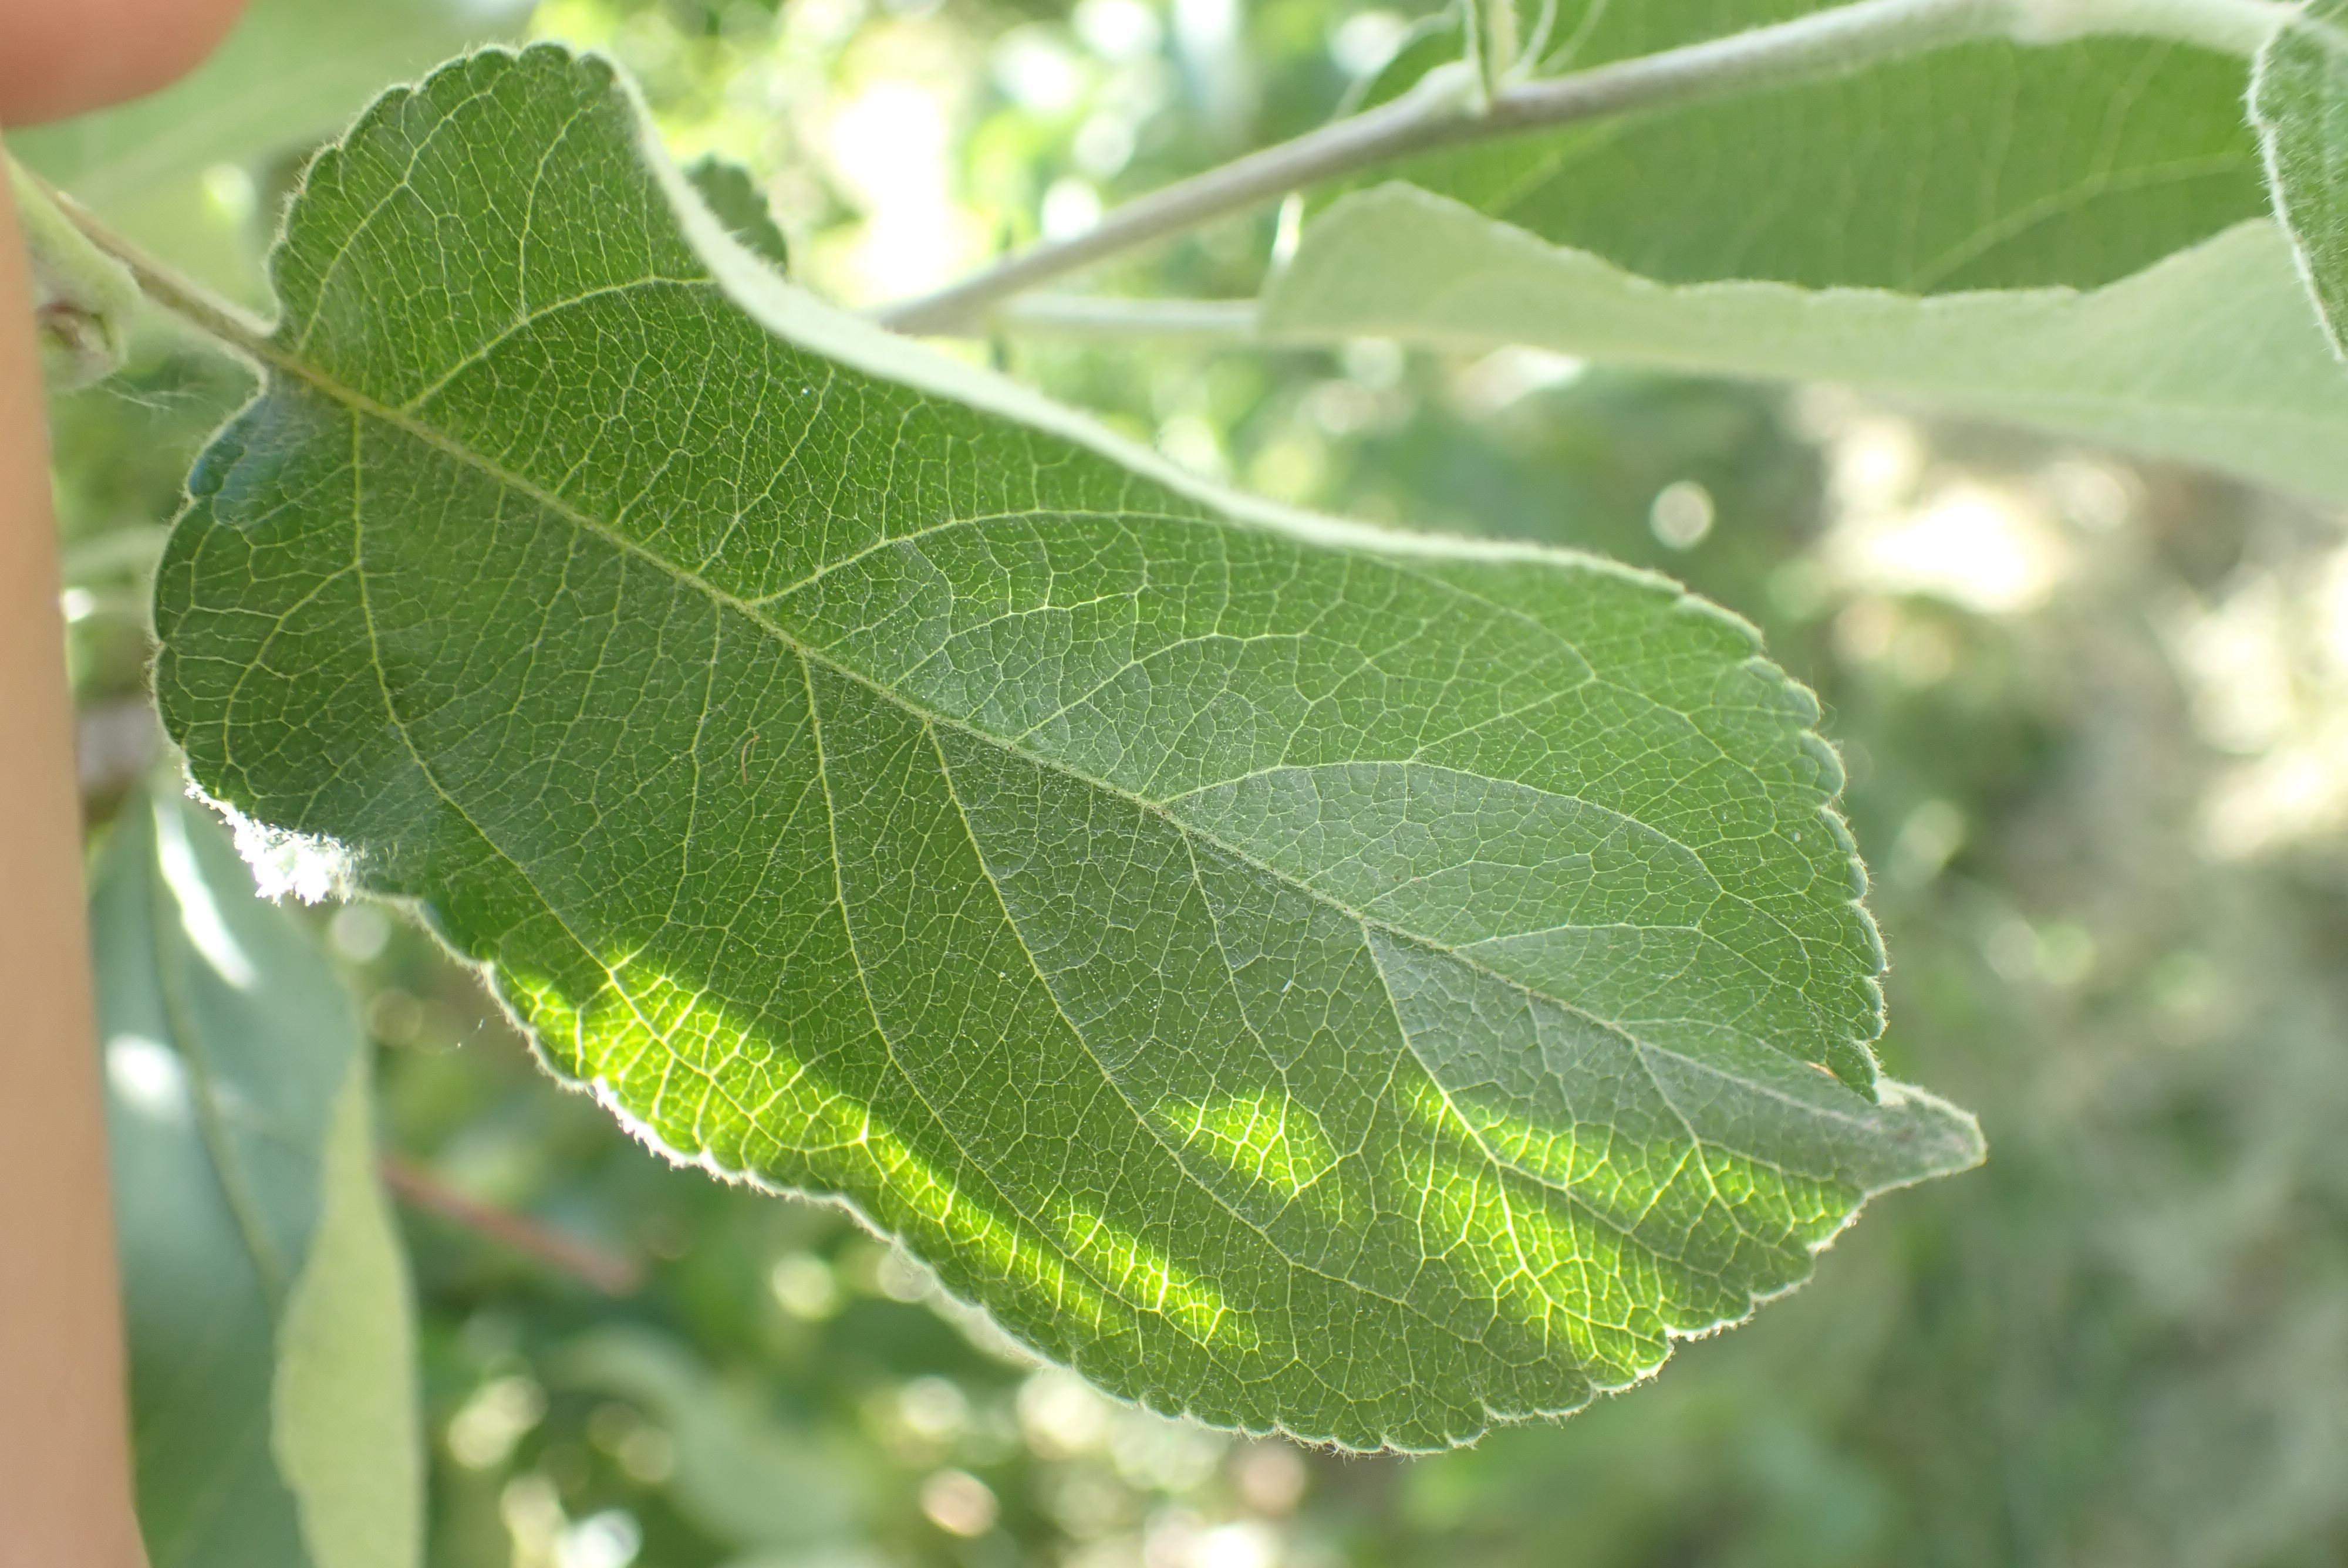

In [6]:
from PIL import Image
import IPython.display as display

image_path = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Train/Train/Healthy/9e8fccf26a27a130.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

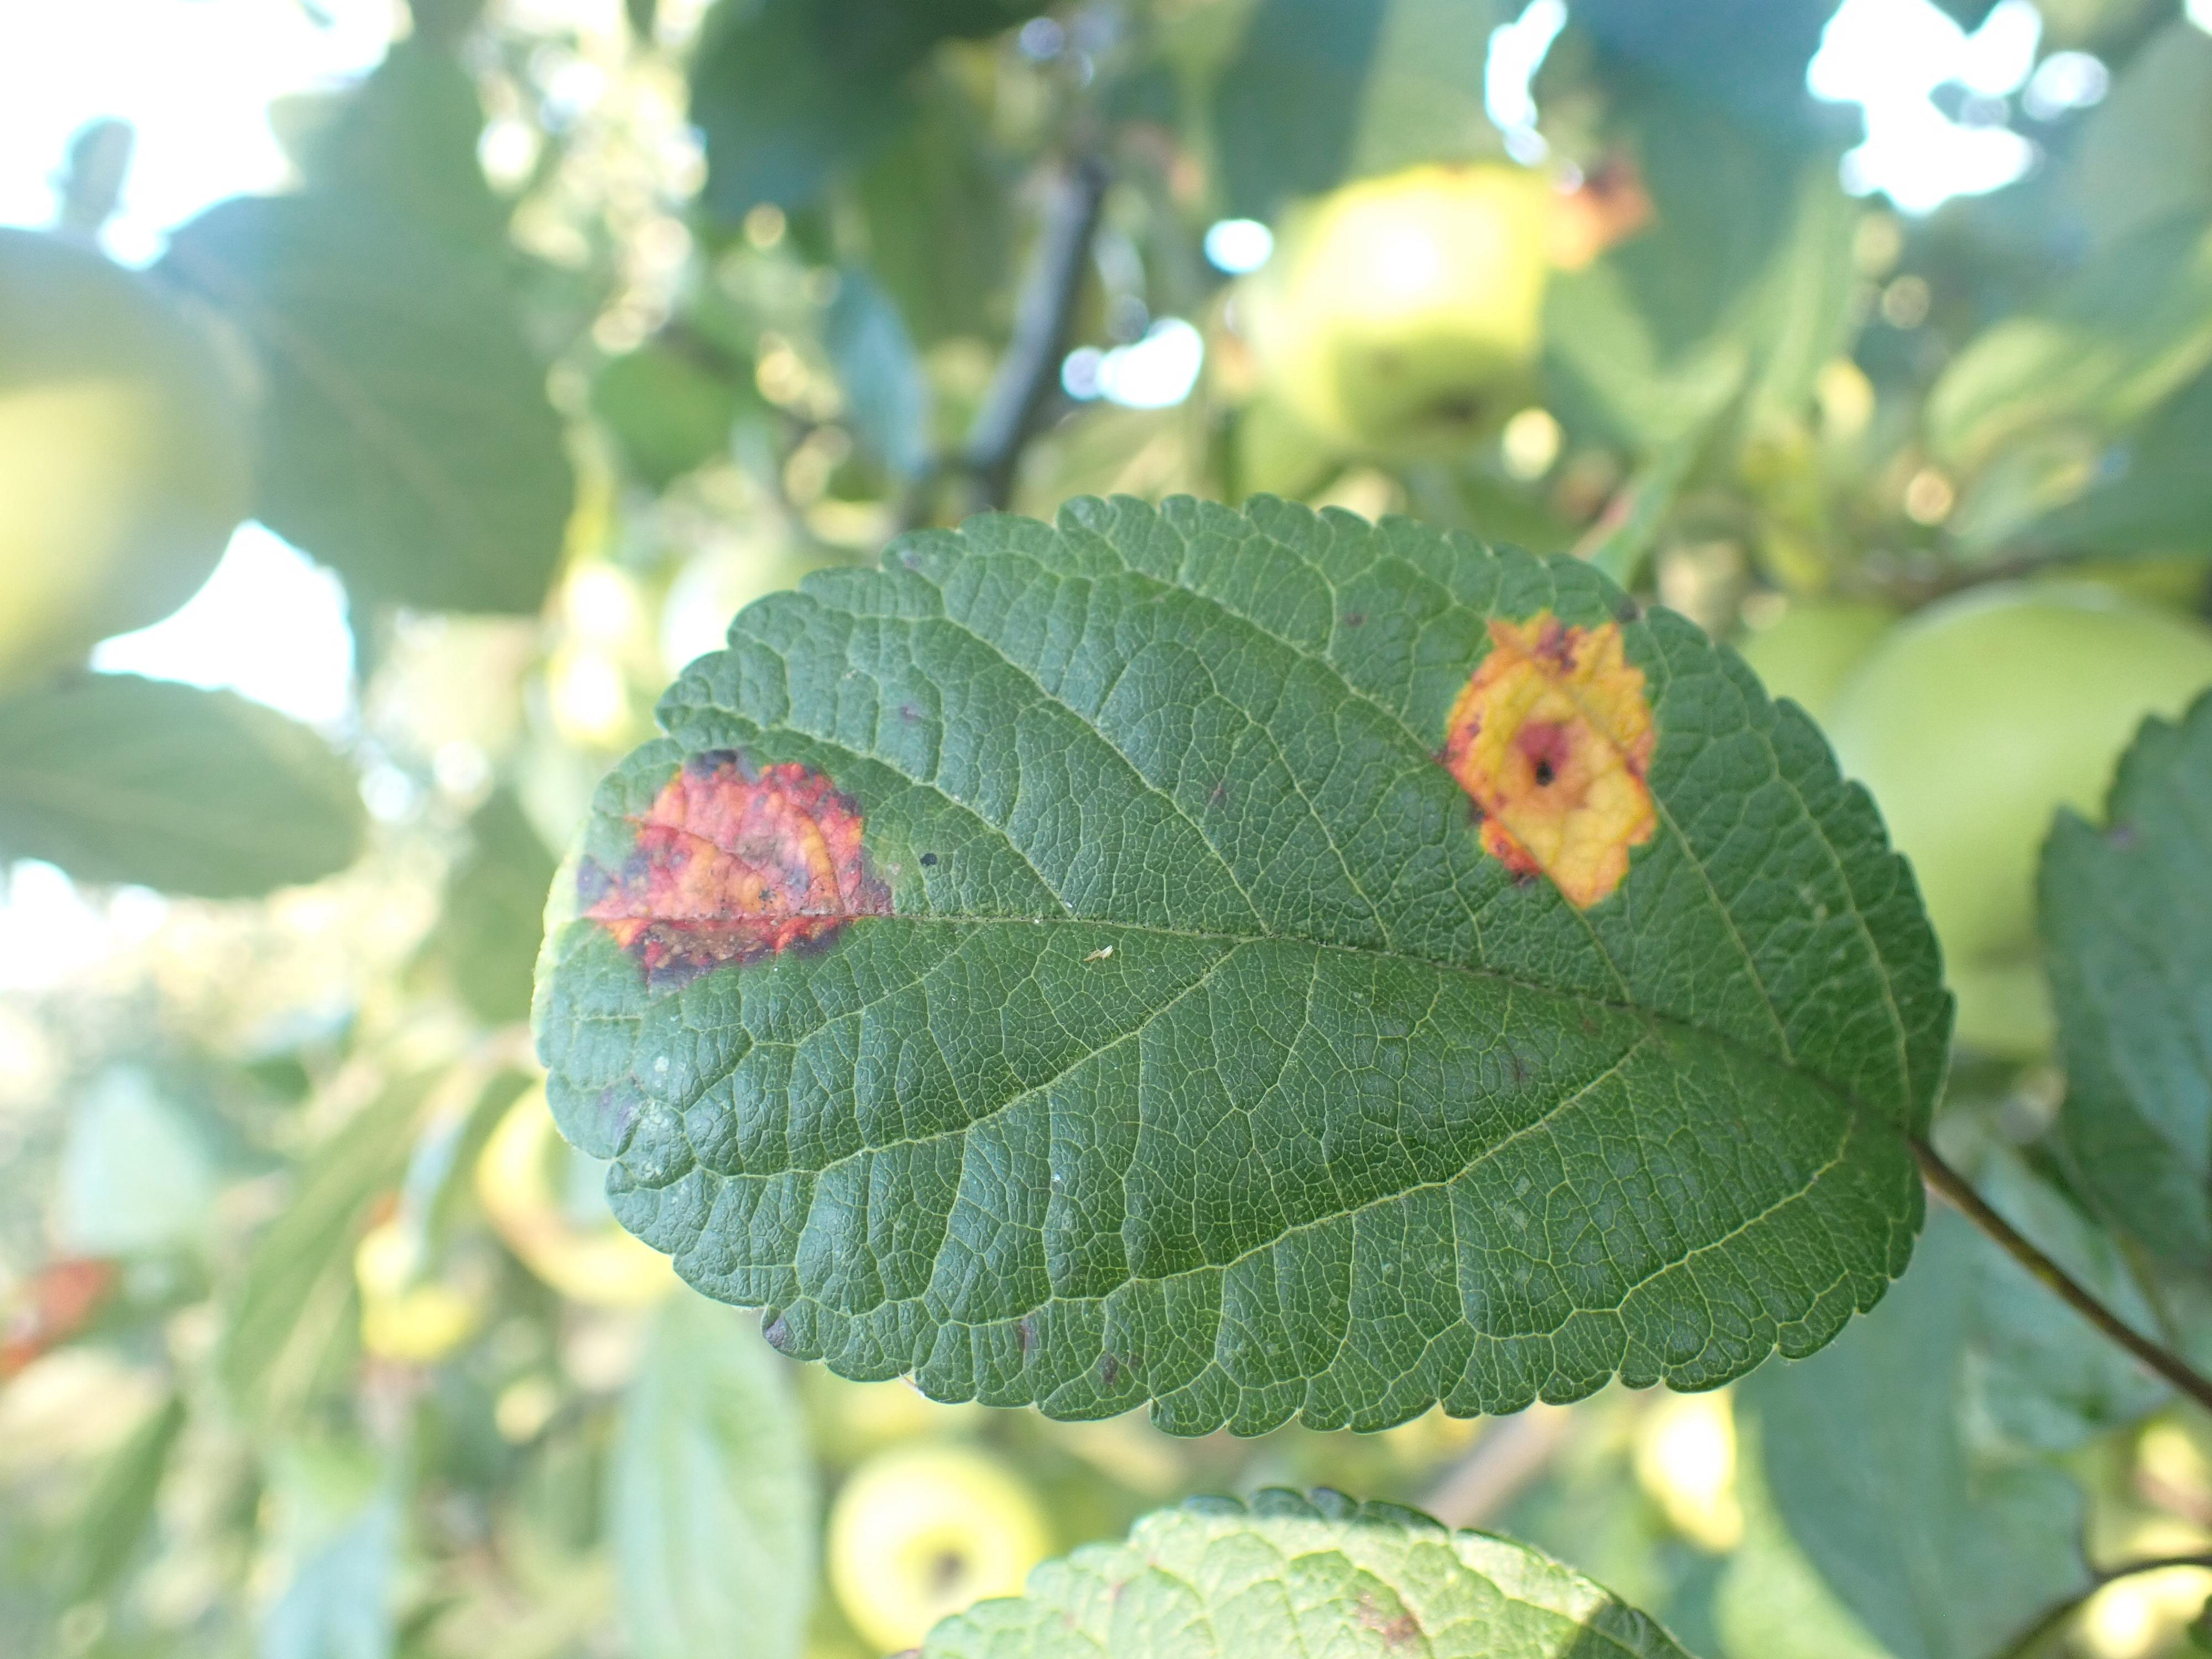

In [7]:
image_path = "C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Train/Train/Rust/f3b19b71a064687c.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory("C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Train/Train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory("C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Validation/Validation",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/10
42/42 [==============================] - 182s 4s/step - loss: 1.2939 - accuracy: 0.5234 - val_loss: 1.2288 - val_accuracy: 0.5500
Epoch 2/10
42/42 [==============================] - 173s 4s/step - loss: 0.6431 - accuracy: 0.7133 - val_loss: 0.5618 - val_accuracy: 0.8000
Epoch 3/10
42/42 [==============================] - 167s 4s/step - loss: 0.4095 - accuracy: 0.8260 - val_loss: 0.5816 - val_accuracy: 0.8000
Epoch 4/10
42/42 [==============================] - 165s 4s/step - loss: 0.3191 - accuracy: 0.8752 - val_loss: 0.4738 - val_accuracy: 0.8333
Epoch 5/10
42/42 [==============================] - 161s 4s/step - loss: 0.2802 - accuracy: 0.8911 - val_loss: 0.4713 - val_accuracy: 0.8333
Epoch 6/10
42/42 [==============================] - 157s 4s/step - loss: 0.2331 - accuracy: 0.9297 - val_loss: 0.4381 - val_accuracy: 0.8833
Epoch 7/10
42/42 [==============================] - 157s 4s/step - loss: 0.2032 - accuracy: 0.9372 - val_loss: 0.3693 - val_accuracy: 0.9167
Epoch 8/10
42

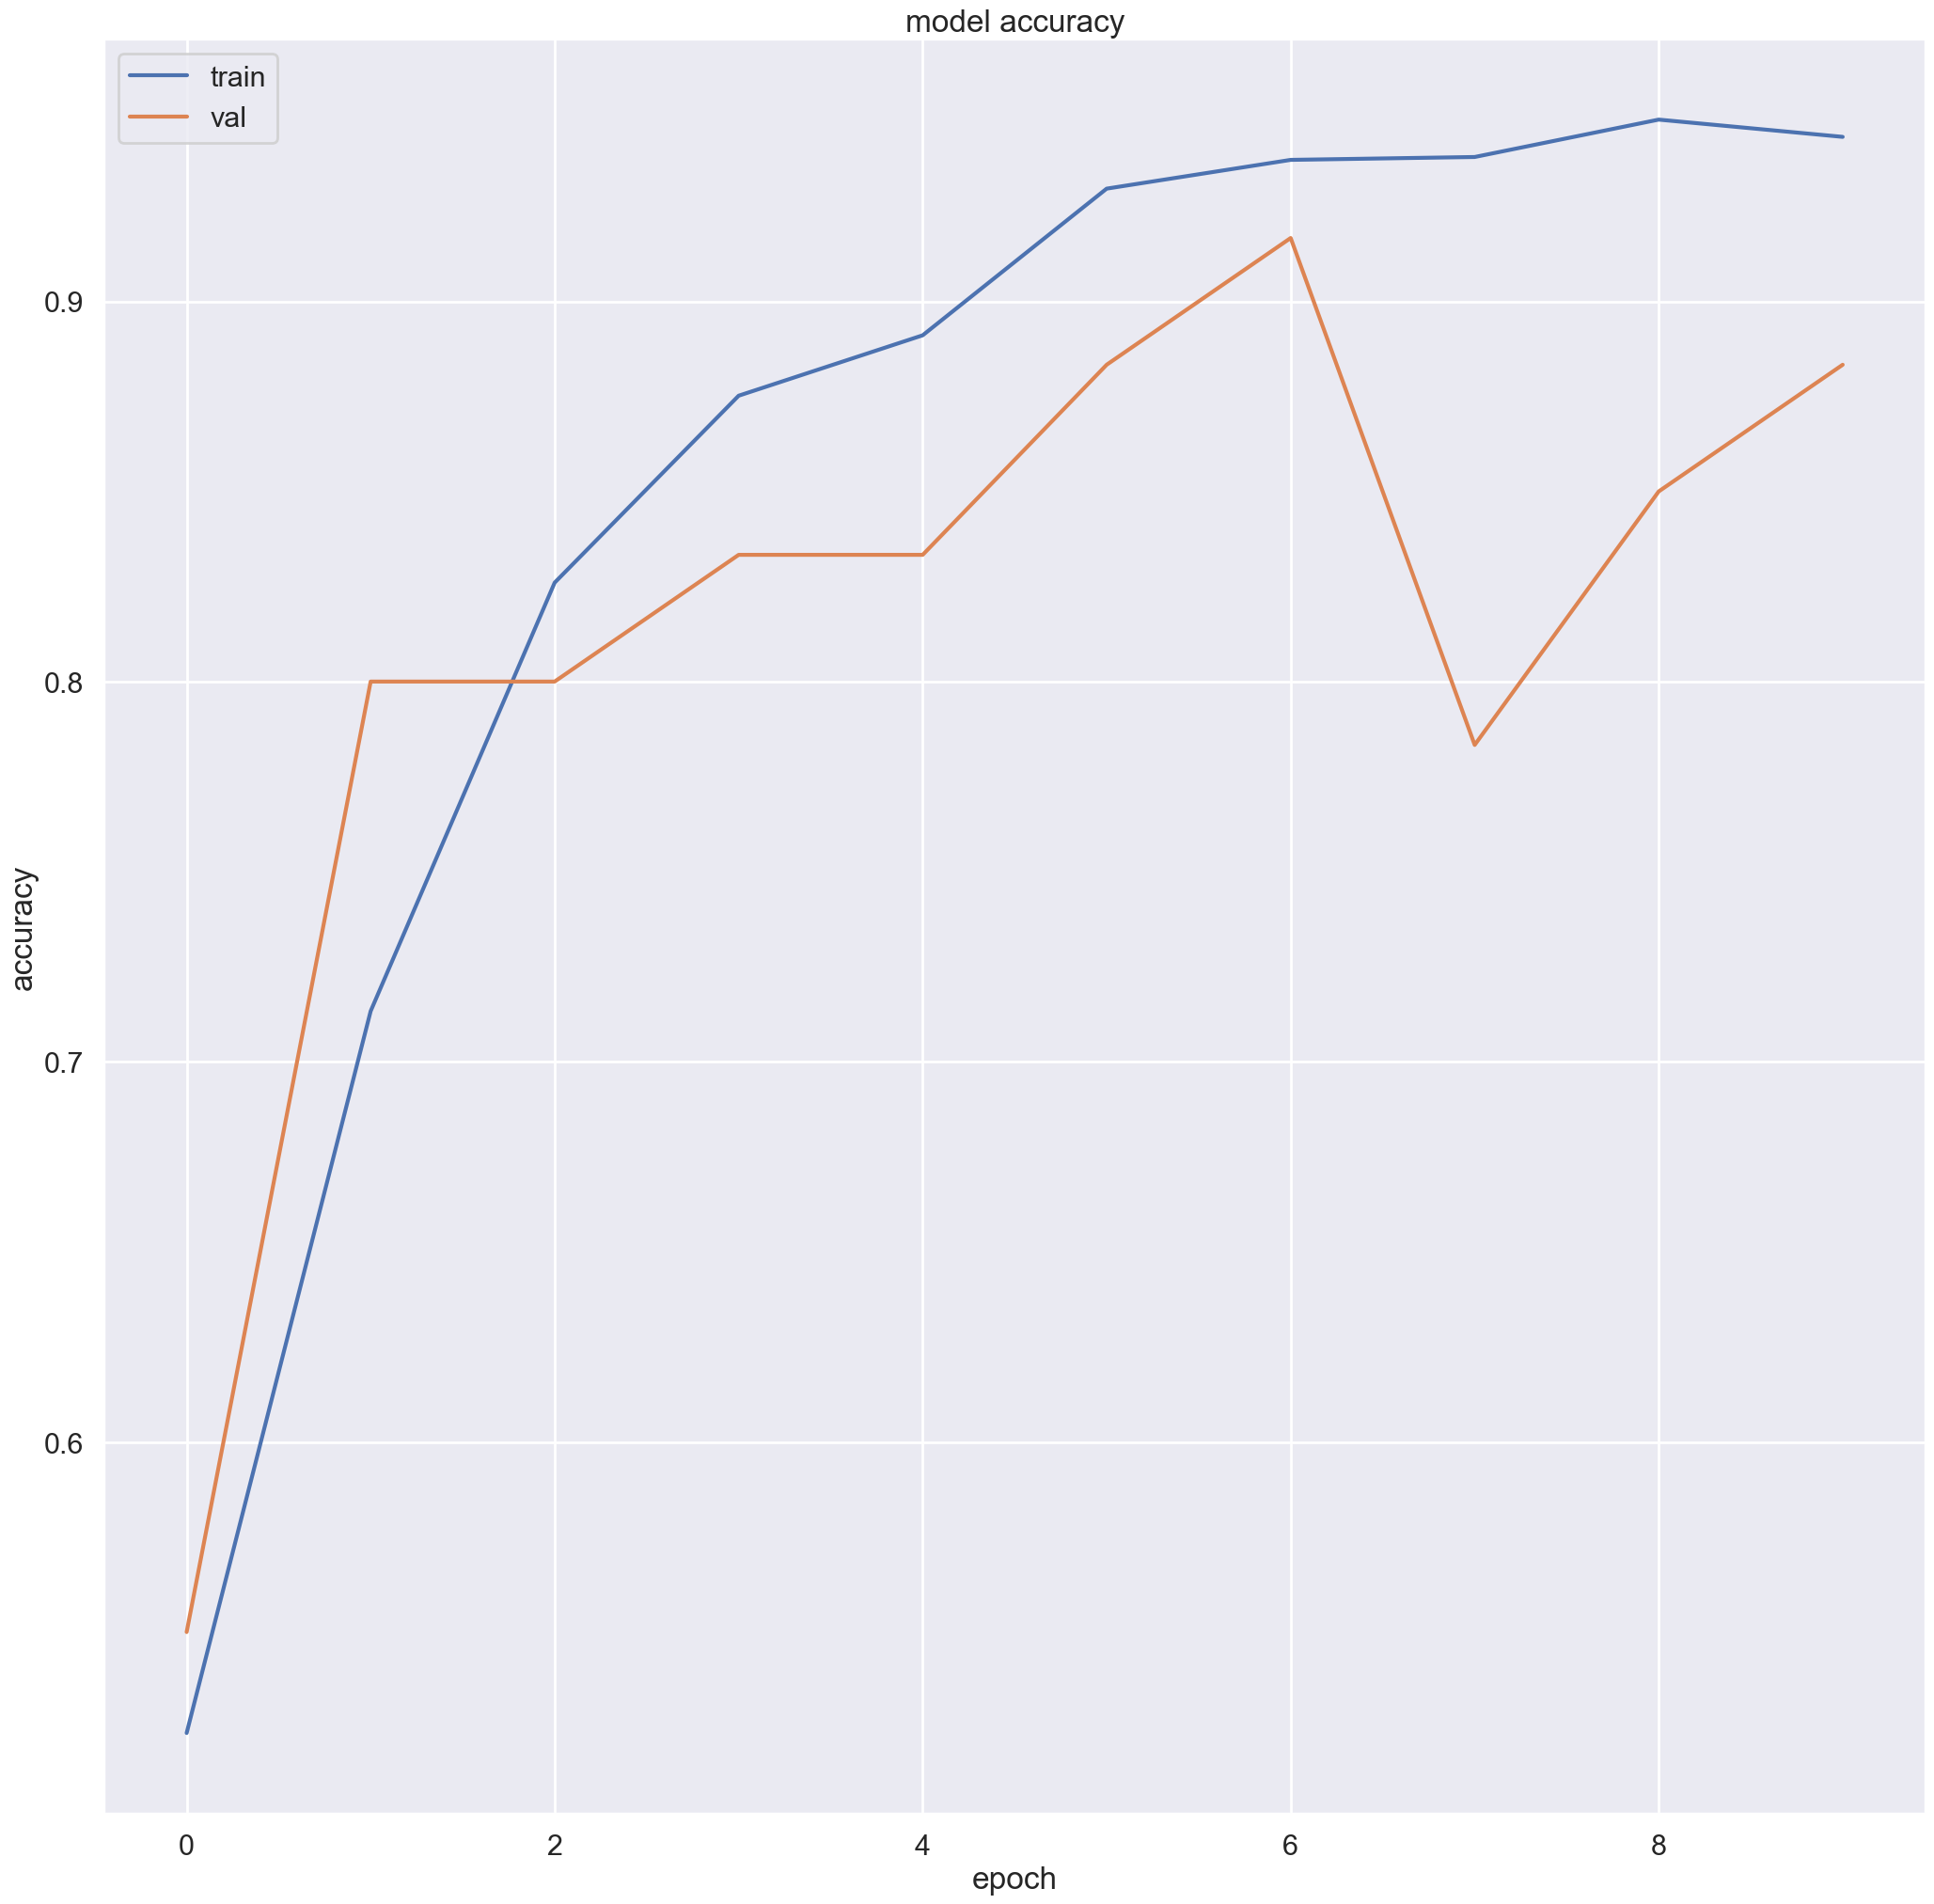

In [22]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
model.save("model.h5")

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image("C:/Users/Sayeed Ahmad Khan/Downloads/Dataset/Test/Test/Rust/99f3639158699cd8.jpg")

In [25]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 240ms/step


array([4.1766818e-20, 2.3368139e-24, 1.0000000e+00], dtype=float32)

In [26]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [19]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
